In [123]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

In [124]:
df = pd.read_csv('../data/ufc-fighters-statistics.csv')
df

,name,nickname,wins,losses,draws,height_cm,weight_in_kg,reach_in_cm,stance,date_of_birth,significant_strikes_landed_per_minute,significant_striking_accuracy,significant_strikes_absorbed_per_minute,significant_strike_defence,average_takedowns_landed_per_15_minutes,takedown_accuracy,takedown_defense,average_submissions_attempted_per_15_minutes
0,Robert Drysdale,NaN,7,0,0,190.50,92.99,NaN,Orthodox,1981-10-05,0.00,0.0,0.00,0.0,7.32,100.0,0.0,21.9
1,Daniel McWilliams,The Animal,15,37,0,185.42,83.91,NaN,NaN,NaN,3.36,77.0,0.00,0.0,0.00,0.0,100.0,21.6
2,Dan Molina,NaN,13,9,0,177.80,97.98,NaN,NaN,NaN,0.00,0.0,5.58,60.0,0.00,0.0,0.0,20.9
3,Paul Ruiz,NaN,7,4,0,167.64,61.23,NaN,NaN,NaN,1.40,33.0,1.40,75.0,0.00,0.0,100.0,20.9
4,Collin Huckbody,All In,8,2,0,190.50,83.91,193.04,Orthodox,1994-09-29,2.05,60.0,2.73,42.0,10.23,100.0,0.0,20.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4106,John Campetella,NaN,0,1,0,175.26,106.59,NaN,Orthodox,NaN,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0
4107,Andre Pederneiras,NaN,1,1,2,172.72,70.31,NaN,Orthodox,1967-03-22,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0
4108,Bryson Kamaka,NaN,12,20,1,180.34,77.11,NaN,Orthodox,NaN,9.47,60.0,12.63,0.0,0.00,0.0,100.0,0.0
4109,Matej Penaz,Money,6,1,0,190.50,83.91,210.82,Southpaw,1996-10-14,1.28,33.0,2.55,33.0,0.00,0.0,0.0,0.0


In [125]:
duplicates = df['name'].duplicated(keep=False)
df[duplicates]

,name,nickname,wins,losses,draws,height_cm,weight_in_kg,reach_in_cm,stance,date_of_birth,significant_strikes_landed_per_minute,significant_striking_accuracy,significant_strikes_absorbed_per_minute,significant_strike_defence,average_takedowns_landed_per_15_minutes,takedown_accuracy,takedown_defense,average_submissions_attempted_per_15_minutes
501,Michael McDonald,Mayday,17,4,0,175.26,61.23,177.80,Orthodox,1991-01-15,2.69,42.0,2.76,57.0,1.09,66.0,52.0,1.4
1478,Bruno Silva,Bulldog,13,5,2,162.56,56.70,165.10,Orthodox,1990-03-16,3.05,46.0,3.09,59.0,2.57,30.0,64.0,0.3
1598,Mike Davis,Beast Boy,10,2,0,182.88,70.31,182.88,Orthodox,1992-10-07,5.83,52.0,6.20,56.0,3.04,53.0,69.0,0.2
1829,Jean Silva,Lord Assassin,11,2,0,170.18,65.77,175.26,Orthodox,1996-12-13,5.80,48.0,4.73,55.0,1.00,33.0,100.0,0.0
1932,Joey Gomez,KO King,6,2,0,177.80,61.23,185.42,Orthodox,1986-07-21,2.44,28.0,4.46,55.0,0.62,100.0,50.0,0.0
2089,Joey Gomez,NaN,7,1,0,177.80,70.31,180.34,Orthodox,1989-08-29,3.73,49.0,3.33,50.0,2.00,28.0,0.0,0.0
2404,Michael McDonald,The Black Sniper,1,1,0,180.34,92.99,NaN,Orthodox,1965-02-06,0.00,0.0,0.40,50.0,0.00,0.0,0.0,0.0
2560,Bruno Silva,Blindado,23,10,0,182.88,83.91,187.96,Orthodox,1989-07-13,4.43,51.0,5.33,43.0,1.09,27.0,73.0,0.0
2736,Tony Johnson,NaN,11,3,0,185.42,120.20,NaN,NaN,NaN,2.00,53.0,4.73,31.0,2.00,22.0,0.0,0.0
2789,Tony Johnson,NaN,7,2,0,187.96,92.99,193.04,Orthodox,1983-05-02,4.00,92.0,3.67,22.0,0.00,0.0,90.0,0.0


In [126]:
df2 = df[~duplicates]

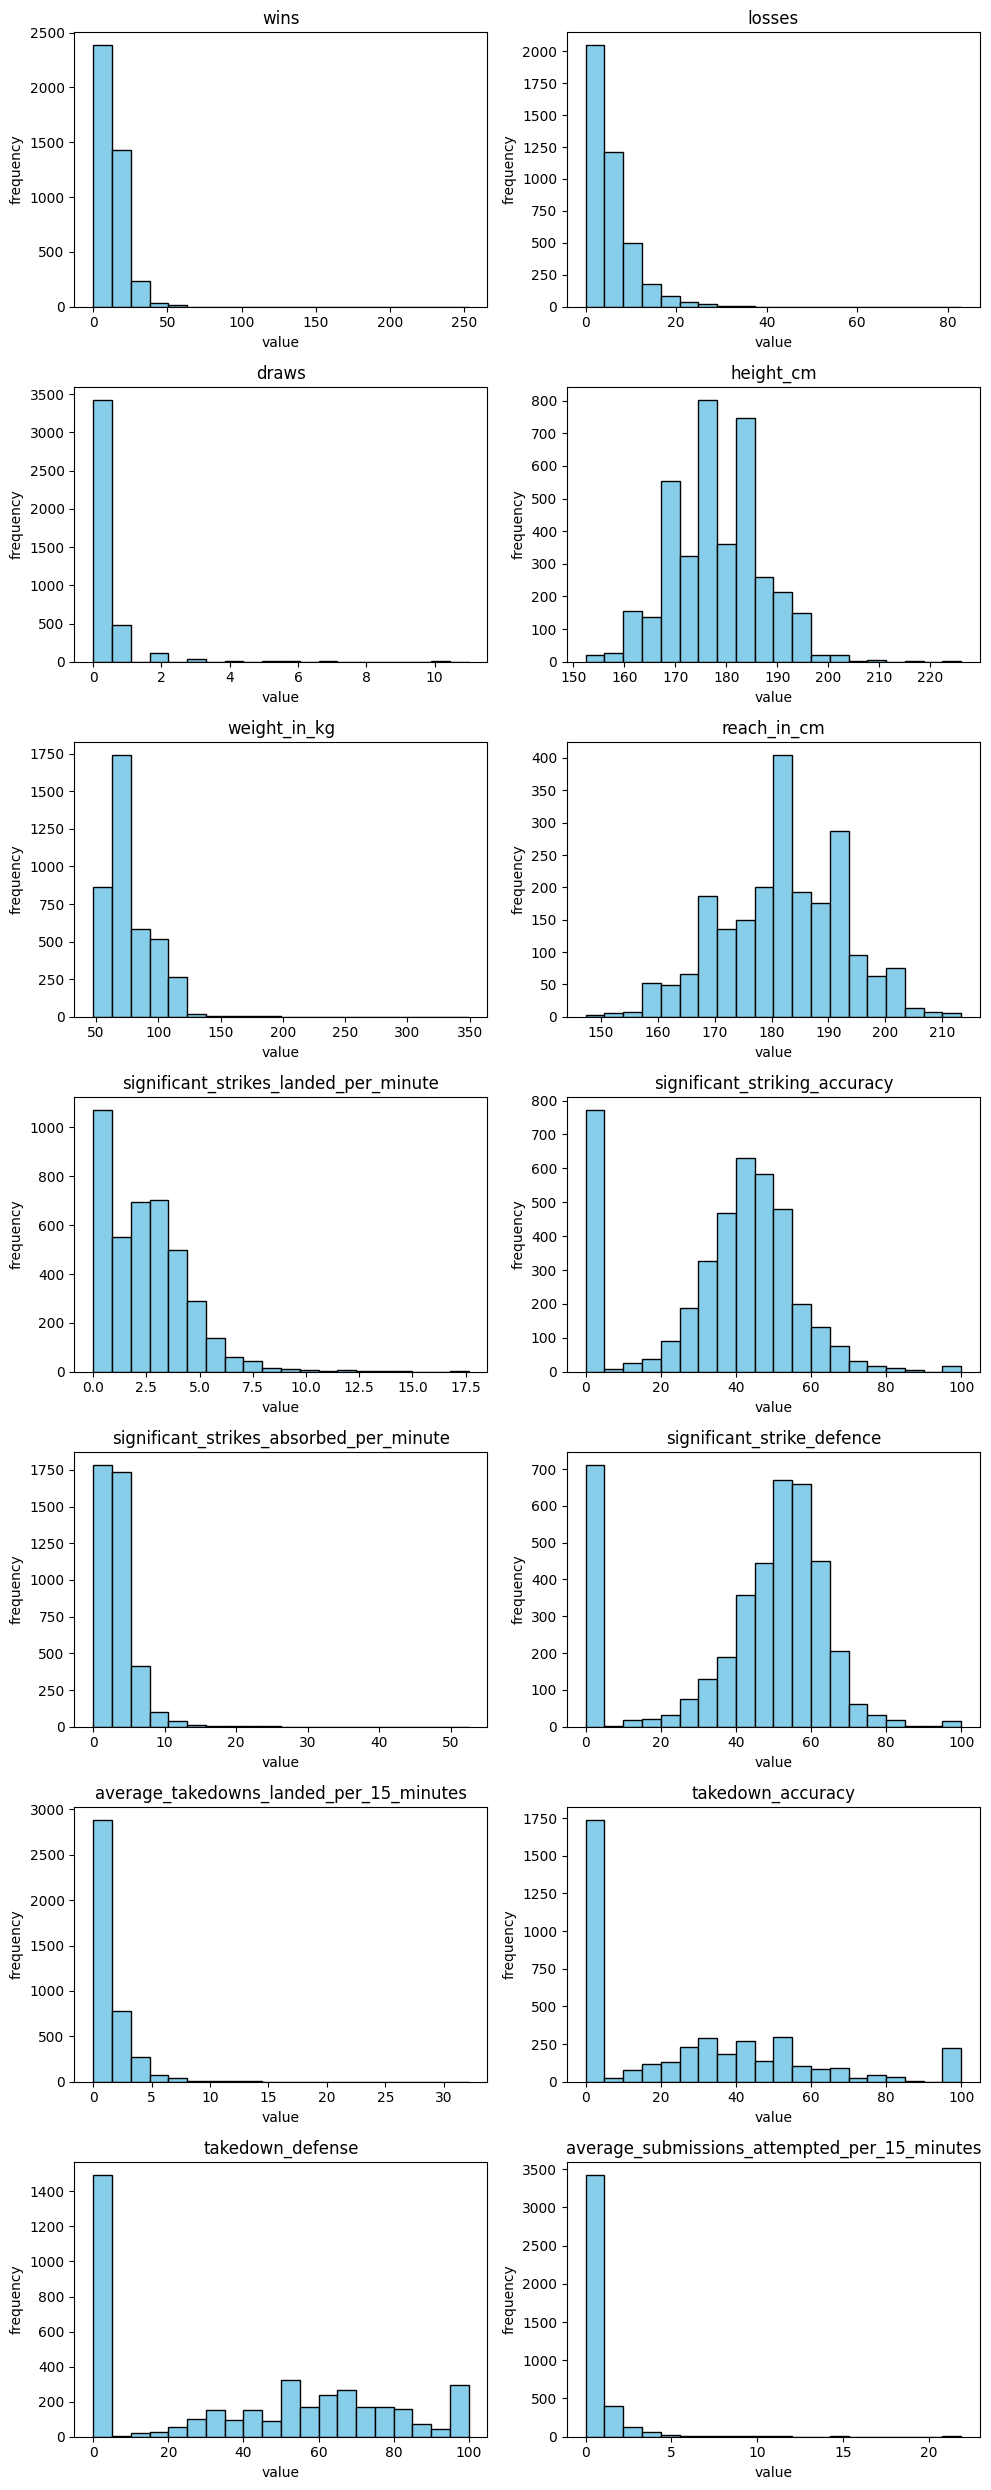

In [163]:
columns_to_visualize = ['wins', 'losses', 'draws', 'height_cm', 'weight_in_kg', 'reach_in_cm', 'significant_strikes_landed_per_minute', 'significant_striking_accuracy', 'significant_strikes_absorbed_per_minute', 'significant_strike_defence', 'average_takedowns_landed_per_15_minutes', 'takedown_accuracy', 'takedown_defense', 'average_submissions_attempted_per_15_minutes']

fig, axs = plt.subplots(7, 2, figsize=(10, 25))

for i, column in enumerate(columns_to_visualize):
    row = i // 2
    col = i % 2
    axs[row, col].hist(df2[column], bins=20, color='skyblue', edgecolor='black')
    axs[row, col].set_title(column)
    axs[row, col].set_xlabel('value')
    axs[row, col].set_ylabel('frequency')
    
plt.tight_layout()
plt.show()

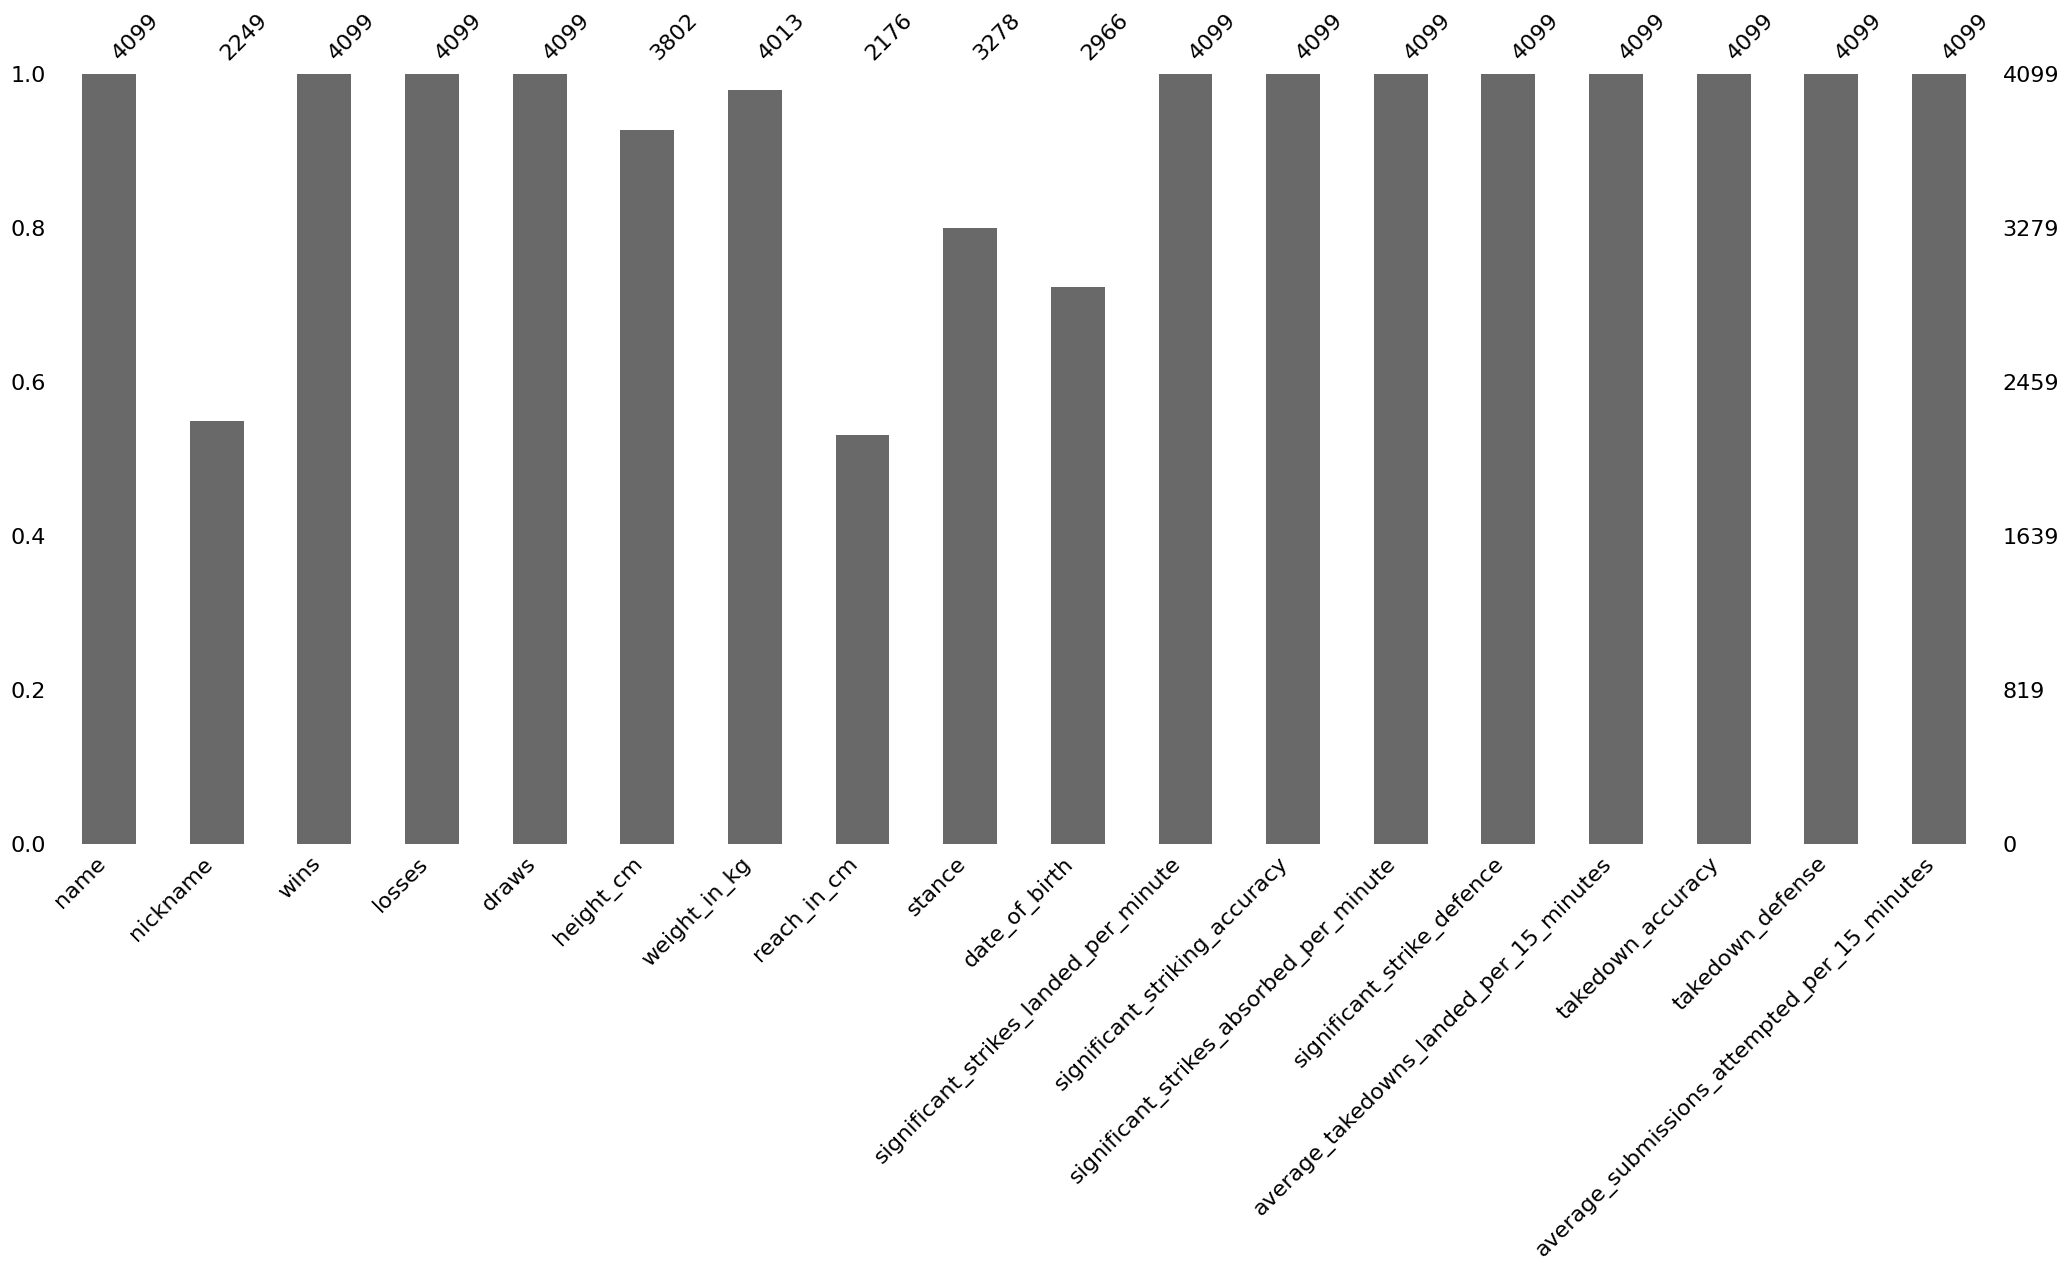

In [127]:
msno.bar(df2);

In [128]:
df2.isnull().sum() / len(df2) * 100

name                                             0.000000
nickname                                        45.132959
wins                                             0.000000
losses                                           0.000000
draws                                            0.000000
height_cm                                        7.245670
weight_in_kg                                     2.098073
reach_in_cm                                     46.913881
stance                                          20.029275
date_of_birth                                   27.640888
significant_strikes_landed_per_minute            0.000000
significant_striking_accuracy                    0.000000
significant_strikes_absorbed_per_minute          0.000000
significant_strike_defence                       0.000000
average_takedowns_landed_per_15_minutes          0.000000
takedown_accuracy                                0.000000
takedown_defense                                 0.000000
average_submis

In [129]:
columns_to_remove = ['nickname', 'date_of_birth', 'reach_in_cm']
df3 = df2.drop(columns_to_remove, axis=1)

In [130]:
df3

,name,wins,losses,draws,height_cm,weight_in_kg,stance,significant_strikes_landed_per_minute,significant_striking_accuracy,significant_strikes_absorbed_per_minute,significant_strike_defence,average_takedowns_landed_per_15_minutes,takedown_accuracy,takedown_defense,average_submissions_attempted_per_15_minutes
0,Robert Drysdale,7,0,0,190.50,92.99,Orthodox,0.00,0.0,0.00,0.0,7.32,100.0,0.0,21.9
1,Daniel McWilliams,15,37,0,185.42,83.91,NaN,3.36,77.0,0.00,0.0,0.00,0.0,100.0,21.6
2,Dan Molina,13,9,0,177.80,97.98,NaN,0.00,0.0,5.58,60.0,0.00,0.0,0.0,20.9
3,Paul Ruiz,7,4,0,167.64,61.23,NaN,1.40,33.0,1.40,75.0,0.00,0.0,100.0,20.9
4,Collin Huckbody,8,2,0,190.50,83.91,Orthodox,2.05,60.0,2.73,42.0,10.23,100.0,0.0,20.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4106,John Campetella,0,1,0,175.26,106.59,Orthodox,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0
4107,Andre Pederneiras,1,1,2,172.72,70.31,Orthodox,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0
4108,Bryson Kamaka,12,20,1,180.34,77.11,Orthodox,9.47,60.0,12.63,0.0,0.00,0.0,100.0,0.0
4109,Matej Penaz,6,1,0,190.50,83.91,Southpaw,1.28,33.0,2.55,33.0,0.00,0.0,0.0,0.0


In [133]:
df4 = df3.copy()

impute_mean = SimpleImputer(strategy='mean')
impute_mode = SimpleImputer(strategy='most_frequent')

df4[['height_cm', 'weight_in_kg']] = impute_mean.fit_transform(df4[['height_cm', 'weight_in_kg']])
df4[['stance']] = impute_mode.fit_transform(df4[['stance']])

In [135]:
df4

,name,wins,losses,draws,height_cm,weight_in_kg,stance,significant_strikes_landed_per_minute,significant_striking_accuracy,significant_strikes_absorbed_per_minute,significant_strike_defence,average_takedowns_landed_per_15_minutes,takedown_accuracy,takedown_defense,average_submissions_attempted_per_15_minutes
0,Robert Drysdale,7,0,0,190.50,92.99,Orthodox,0.00,0.0,0.00,0.0,7.32,100.0,0.0,21.9
1,Daniel McWilliams,15,37,0,185.42,83.91,Orthodox,3.36,77.0,0.00,0.0,0.00,0.0,100.0,21.6
2,Dan Molina,13,9,0,177.80,97.98,Orthodox,0.00,0.0,5.58,60.0,0.00,0.0,0.0,20.9
3,Paul Ruiz,7,4,0,167.64,61.23,Orthodox,1.40,33.0,1.40,75.0,0.00,0.0,100.0,20.9
4,Collin Huckbody,8,2,0,190.50,83.91,Orthodox,2.05,60.0,2.73,42.0,10.23,100.0,0.0,20.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4106,John Campetella,0,1,0,175.26,106.59,Orthodox,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0
4107,Andre Pederneiras,1,1,2,172.72,70.31,Orthodox,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0
4108,Bryson Kamaka,12,20,1,180.34,77.11,Orthodox,9.47,60.0,12.63,0.0,0.00,0.0,100.0,0.0
4109,Matej Penaz,6,1,0,190.50,83.91,Southpaw,1.28,33.0,2.55,33.0,0.00,0.0,0.0,0.0


In [137]:
df4['significant_striking_accuracy'].value_counts() /len(df4) * 100

significant_striking_accuracy
0.0     18.785070
50.0     3.854599
42.0     3.439863
40.0     3.415467
41.0     3.293486
          ...    
7.0      0.024396
78.0     0.024396
4.0      0.024396
86.0     0.024396
74.0     0.024396
Name: count, Length: 82, dtype: float64